# Лабораторная работа №1. 
## Разведочный анализ данных. Исследование и визуализация данных.

### Датасет **"ZARA Sales"**

## Импорт библиотек и загрузка данных

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


**Описание полей**

1.	Product ID (Идентификатор товара): Уникальный идентификатор каждого товара.
2.	Product Position (Расположение товара): Расположение товара в торговом зале магазина.
3.	Promotion (Акционный): Индикатор того, является ли товар акционным.
4.	Product Category (Категория товара): Категория товара, например, одежда, аксессуары, обувь и т. д.
5.	Seasonal (Сезонный): Индикатор того, входит ли товар в сезонную коллекцию.
6.	Sales Volume (Объем продаж): Количество проданных товаров.
7.	Brand (Бренд): Бренд товара.
8.	URL: URL страницы товара (например, если товар продается онлайн).
9.	SKU (Stock Keeping Unit,): Артикул, уникальный код, используемый для идентификации товаров, доступных для продажи.
10.	Name (Название): Наименование товара.
11.	Description (Описание): Описание товара.
12.	Price (Цена): Цена товара.
13.	Currency (Валюта): Валюта цены товара.
14.	Scraped_at (Дата сбора данных): Время, когда данные были собраны (например, в процессе веб-скрапинга).
15.	Terms (Условия): Условия или положения, касающиеся товара.
16.	Section (Отдел): Отдел или раздел, где продукт продается в магазине (например, женская одежда, мужская одежда, детская одежда и т. д.).

In [4]:
sales = pd.read_csv("zara.csv", sep=';')
sales.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


Переименуем некоторые колонки для удобства

In [5]:
sales.rename(columns={'Product ID': 'ID', 'Product Position': 'position', 'Promotion':'promotion', 'Product Category': 'category', 'Seasonal':'seasonal', 'Sales Volume': 'sales_volume'}, inplace=True)
sales.head(3)

,ID,position,promotion,category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN


## Основные характеристики датасета и очистка данных

Просмотрим сведения о типах данных и количестве не-NULL записей в каждой колонке.

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            252 non-null    int64  
 1   position      252 non-null    object 
 2   promotion     252 non-null    object 
 3   category      252 non-null    object 
 4   seasonal      252 non-null    object 
 5   sales_volume  252 non-null    int64  
 6   brand         252 non-null    object 
 7   url           252 non-null    object 
 8   sku           252 non-null    object 
 9   name          251 non-null    object 
 10  description   250 non-null    object 
 11  price         252 non-null    float64
 12  currency      252 non-null    object 
 13  scraped_at    252 non-null    object 
 14  terms         252 non-null    object 
 15  section       252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 31.6+ KB


In [7]:
sales['description'] = sales['description'].fillna('No description')

Удалим все строки с пропущенными значениями и все дубликаты. Посмотрим на изменения размера (количество строк и столбцов)

In [8]:
print("Количество строк и столбцов")
print("ДО:", sales.shape)
sales.dropna(inplace=True)
sales.drop_duplicates(inplace=True)
print("ПОСЛЕ:", sales.shape)

Количество строк и столбцов
ДО: (252, 16)
ПОСЛЕ: (251, 16)


Преобразуем тип данных колонки "ID" в строку

In [9]:
sales.ID=sales.ID.astype(str)
sales.ID.dtype

dtype('O')

Для определения информативности данных в каждой колонке оценим количество уникальных значений в каждой колонке.

In [10]:
sales.nunique()

ID              251
position          3
promotion         2
category          1
seasonal          2
sales_volume    233
brand             1
url             227
sku             227
name            194
description     222
price            28
currency          1
scraped_at      228
terms             5
section           2
dtype: int64

Посмотрим, какое единственное уникальное значение содержат колонки «category», «brand» и «currency», чтобы учитывать их при дальнейшем анализе.

In [11]:
sales.category.unique()

array(['Clothing'], dtype=object)

In [12]:
sales.brand.unique()

array(['Zara'], dtype=object)

In [13]:
sales.currency.unique()

array(['USD'], dtype=object)

Удалим неинформативные колонки

In [14]:
sales.drop(columns=["brand","url","currency","sku","category","scraped_at"], inplace=True)
sales.set_index('ID', inplace=True)
sales.head()

,position,promotion,seasonal,sales_volume,name,description,price,terms,section
ID,,,,,,,,,
185102,Aisle,No,No,2823,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,jackets,MAN
188771,Aisle,No,No,654,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,jackets,MAN
180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,jackets,MAN
112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,jackets,MAN
192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,jackets,MAN


Добавим поле (total) с суммой выручки от продажи (в USD)

In [15]:
sales['total'] = sales.price * sales.sales_volume

Выясним, какие уникальные значения содержит колонка terms.

In [16]:
sales.terms.unique()

array(['jackets', 'shoes', 'sweaters', 'jeans', 't-shirts'], dtype=object)

Датасет после произведенных пребразований имеет следующий вид:

In [17]:
sales.head(3)

,position,promotion,seasonal,sales_volume,name,description,price,terms,section,total
ID,,,,,,,,,,
185102,Aisle,No,No,2823,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,jackets,MAN,56431.77
188771,Aisle,No,No,654,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,jackets,MAN,110526.00
180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,jackets,MAN,286380.00


## Первичный анализ данных

In [18]:
sales.describe()

,sales_volume,price,total
count,251.000000,251.000000,251.000000
mean,1823.645418,86.082231,154387.946135
std,699.097176,52.116910,107111.917554
min,529.000000,7.990000,4330.580000
25%,1241.000000,49.900000,77568.300000
50%,1841.000000,79.900000,129105.300000
75%,2400.500000,109.000000,199173.450000
max,2989.000000,439.000000,651521.000000


In [19]:
# Вычисляем среднюю цену (average price) и сумму продаж (total sales) по принадлежности к коллекции и категории
seasonality_stats = sales.groupby(["seasonal", "terms"]).agg(
    avg_price=('price', 'mean'),
    total_sales=('sales_volume','sum')
)

# Округляем полученные результаты до 2-х знаков после запятой
seasonality_stats[['avg_price']] = seasonality_stats[['avg_price']].round(2)
seasonality_stats

avg_price  total_sales
seasonal terms                           
No       jackets      106.74       122309
         jeans         56.52         9672
         shoes         65.50        39803
         sweaters      53.40        20270
         t-shirts      63.29        32500
Yes      jackets      104.52       135321
         jeans         76.27         3648
         shoes         63.73        18103
         sweaters      55.47        54972
         t-shirts      73.48        21137

In [20]:
# Вычисляем среднюю цену (average price) и сумму продаж (total sales) по разделу и категории
terms_stats = sales.groupby(["terms","section"]).agg(
    avg_price=('price', 'mean'),
    total_sales=('sales_volume','sum')
)

# Округляем полученные результаты до 2-х знаков после запятой
terms_stats['avg_price'] = terms_stats['avg_price'].round(2)
terms_stats

avg_price  total_sales
terms    section                        
jackets  MAN         105.59       257630
jeans    MAN          63.92        13320
shoes    MAN          64.87        57906
sweaters MAN          75.93        11868
         WOMAN        50.53        63374
t-shirts MAN          67.43        53637

## Визуальное исследование датасета

### Цена и объем продаж

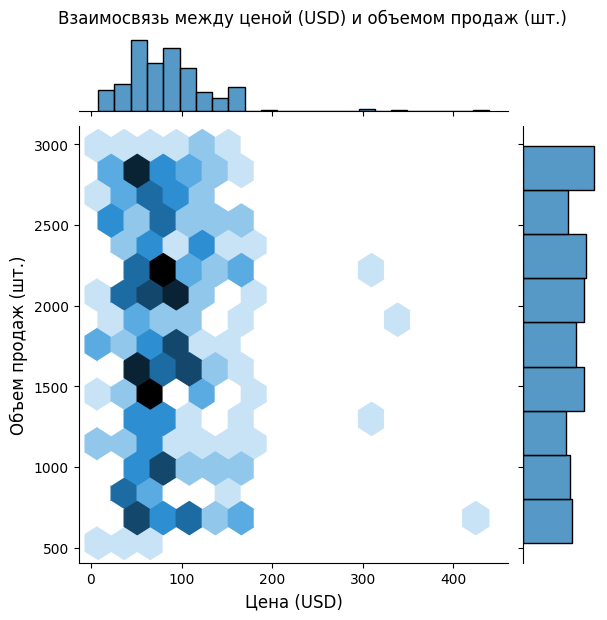

In [ ]:
sns.jointplot(x='price', y='sales_volume', data=sales, kind='hex') 

plt.suptitle("Взаимосвязь между ценой (USD) и объемом продаж (шт.)", y=1.02) 
plt.xlabel('Цена (USD)', fontsize=12)
plt.ylabel('Объем продаж (шт.)', fontsize=12)

plt.show()

### "Парные" диаграммы

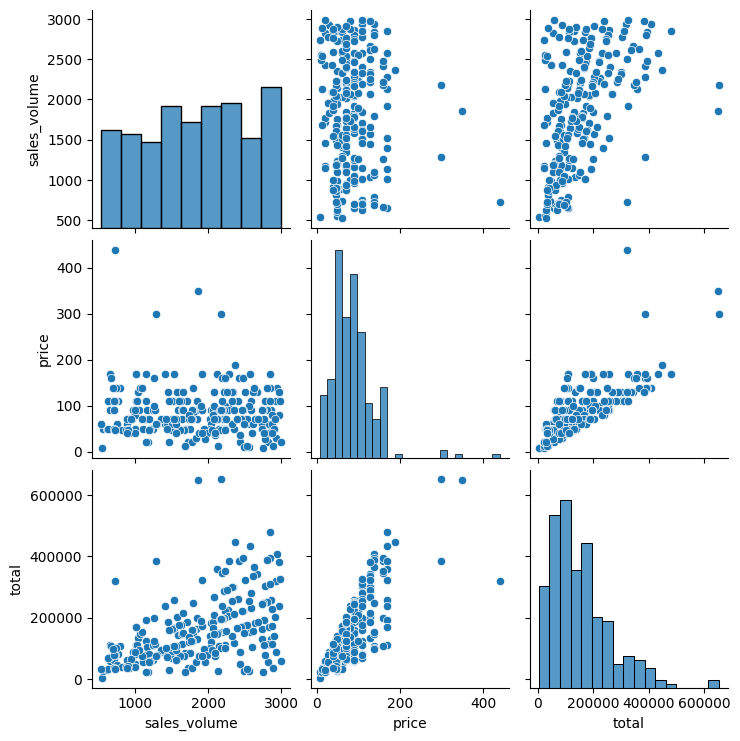

In [ ]:
sns.pairplot(sales)

### Объем продаж акционных товаров по расположению в торговом зале

**Гипотеза:** Лучше всего продаются акционные товары, расположенные в рядах.

Отобразим объем продаж акционных товаров по вариантам расположения в торговом зале.

**Вывод:** Действительно, лучше всего продаются акционные товары, размещенные в рядах и на их торцах. Результат может быть связан с тем, что в рядах и на их торцах может быть размещено наибольшее количество разнообразных товаров.

**Итог проверки:** Подтверждена.

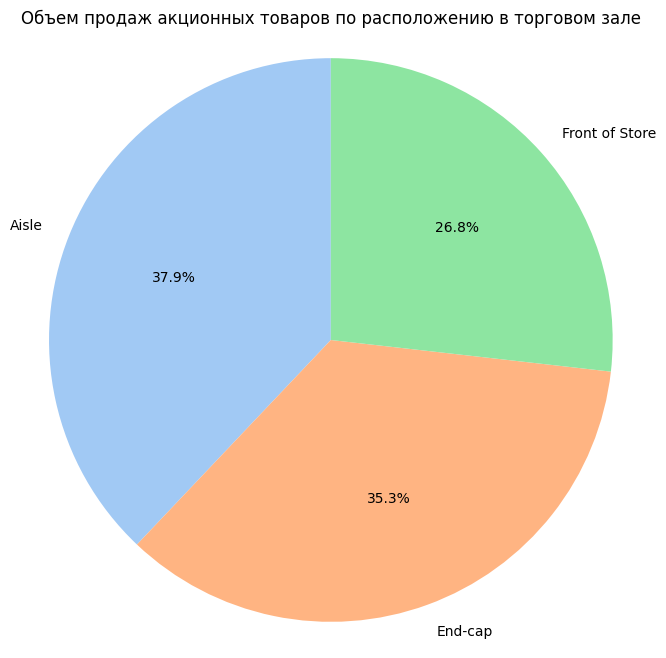

In [21]:
# Отбираем только акционные товары
promotion_products = sales[sales.promotion == "Yes"]

# Подсчитываем объем продаж по вариантам расположения
sales_by_position = promotion_products.groupby('position')['sales_volume'].sum()

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(sales_by_position, labels=sales_by_position.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

# Настраиваем заголовок
plt.title('Объем продаж акционных товаров по расположению в торговом зале')

# Выводим диаграмму
plt.axis('equal')  # Чтобы круг был правильной формы
plt.show()

### Средняя цена товара по категориям

**Гипотеза:** Средняя стоимость товаров, принадлежащих некоторой коллекции, всегда выше средней стоимости вещи из регулярного ассортимента.

Отобразим среднюю цену товара для каждой категории с разбиением по принадлежности к коллекции.

**Вывод:** Из диаграммы видно, что цены коллекционных и регулярных товаров заметно отличаются только для обуви и футболок, для остальных категорий - значения очень близкие. Тем не менее, мы наблюдаем, что средняя цена у курток и обуви из регулярной линейки выше, чем у товаров, принадлежащих коллекции. Отсюда следует, что не всегда средняя стоимость товаров, принадлежащих некоторой коллекции, выше средней стоимости вещи из регулярного ассортимента.

**Итог проверки:** Опровергнута.


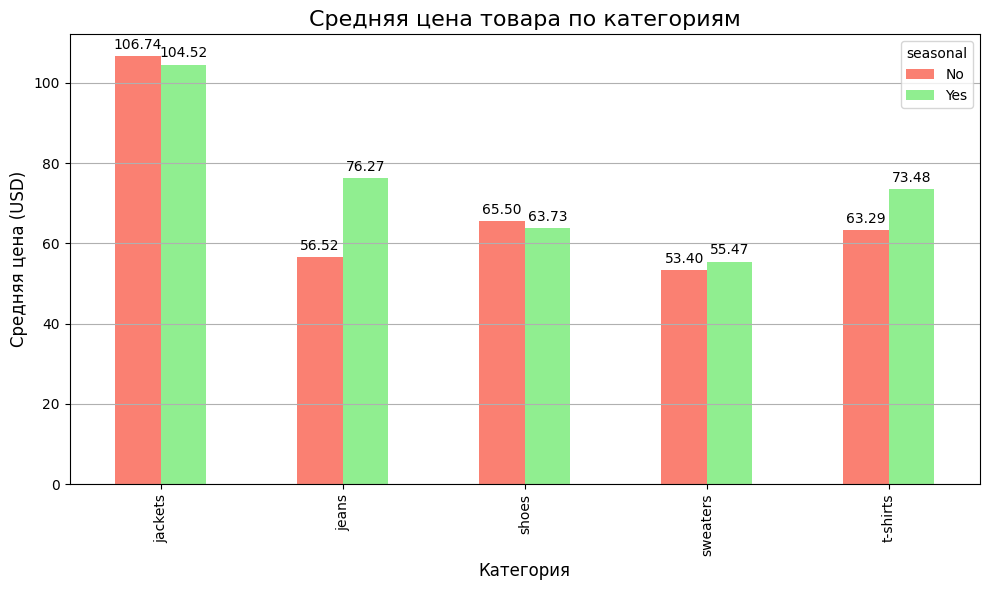

In [22]:
# Рассчитываем среднюю цену для каждой категории с разбиением по seasonal
avg_price = sales.groupby(['terms', 'seasonal'])['price'].mean().unstack(fill_value=0)

# Создаем столбчатую диаграмму
fig, ax = plt.subplots(figsize=(10, 6))
avg_price.plot(kind='bar', ax=ax, color=['salmon', 'lightgreen'])

# Настройка заголовка и меток
ax.set_title('Средняя цена товара по категориям', fontsize=16)
ax.set_xlabel('Категория', fontsize=12)
ax.set_ylabel('Средняя цена (USD)', fontsize=12)

# Добавление значений над столбцами
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.grid(axis='y')
plt.tight_layout()
plt.show()

### Объем продаж по отделам

**Гипотеза:** Объем продаж в женском отделе больше, чем в мужском.

Построим стековую столбчатую и круговую диаграммы, чтобы визуализировать объемы продаж по отделам.

**Вывод:** Объем продаж в мужском отделе на 72% превышает объем продаж в женском отделе.

**Итог:** Опровергнута.



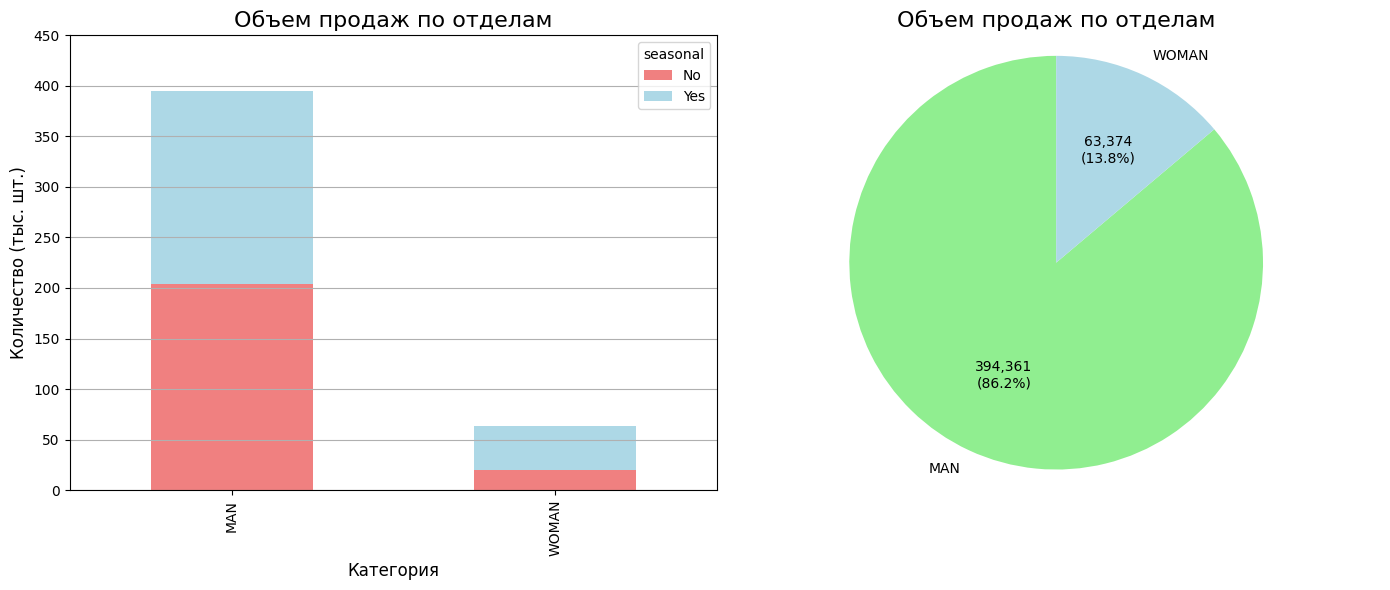

In [23]:
# Рассчитываем объем продаж для каждой категории, с учетом принадлежности к коллекции
seasonal_totals = sales.groupby(['section', 'seasonal']).agg({'sales_volume': 'sum'}).unstack(fill_value=0)
seasonal_totals.columns = seasonal_totals.columns.droplevel()

# Создаем фигуру и оси
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Первый график: стековая столбчатая диаграмма
seasonal_totals.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=axs[0])
axs[0].set_title('Объем продаж по отделам', fontsize=16)
axs[0].set_xlabel('Категория', fontsize=12)
axs[0].set_ylabel('Количество (тыс. шт.)', fontsize=12)

# Преобразуем метки оси Y в тысячи
ticks = axs[0].get_yticks()
axs[0].set_yticks(ticks)
axs[0].set_yticklabels([int(tick / 1e3) for tick in ticks])

axs[0].grid(axis='y')

# Второй график: круговая диаграмма объема продаж по сезонности
seasonal_totals = sales.groupby('section').agg({'sales_volume': 'sum'}).reset_index()

# Определаем функции для отображения пользовательских меток
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute:,}\n({pct:.1f}%)'

# Создаем круговую диаграмму
axs[1].pie(seasonal_totals['sales_volume'], labels=seasonal_totals['section'],
           autopct=lambda pct: func(pct, seasonal_totals['sales_volume']), startangle=90,
           colors=['lightgreen', 'lightblue'])

axs[1].set_title('Объем продаж по отделам', fontsize=16)
axs[1].axis('equal')  # Для равного радиуса круговой диаграммы

plt.tight_layout()
plt.show()

### Цена товара и его расположение в торговом зале

**Гипотеза:** Самые дорогие товары располагают на витрине, а самые дешевые - в рядах и на торцах.

Построим столбчатые диаграммы, чтобы визуализировать максимальную и минимальную цены по расположению с разбиением по отделам.

**Вывод:** Самые дешевые мужские товары располагают в рядах, а дорогие - на витринах. Самые дешевые женские товары размещают на витрине, а дорогие - также на витрине.

**Итог:** Опровергнута.

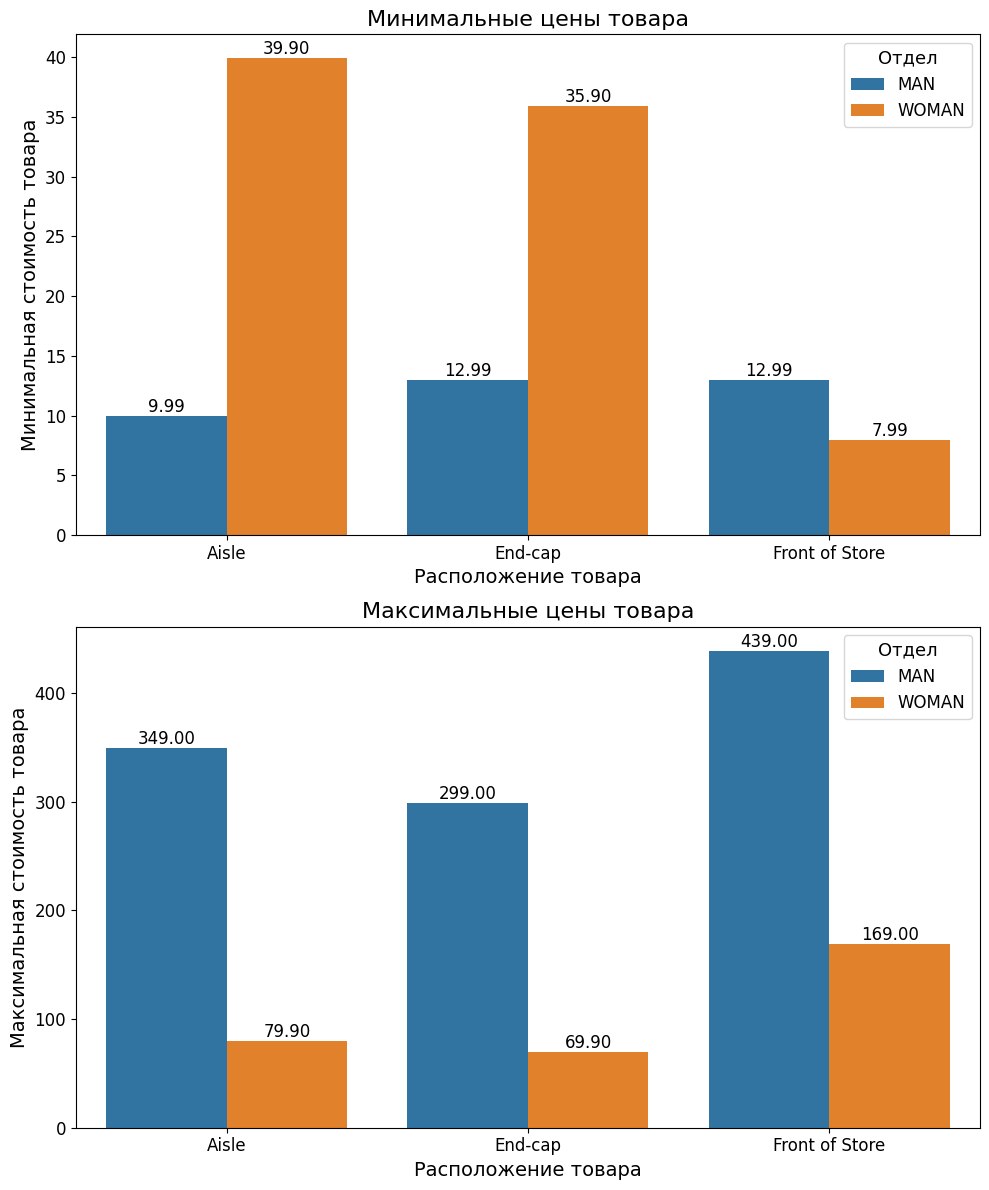

In [24]:
# Вычисляем минимальные и максимальные значения для каждого положения и отдела
min_max = sales.groupby(['position', 'section'])['price'].agg(['min', 'max']).reset_index()

# Создаем подграфики
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# График для минимальных значений
bar_min = sns.barplot(data=min_max, x='position', y='min', hue='section', ax=axes[0])
axes[0].set_title('Минимальные цены товара', fontsize=16)
axes[0].set_xlabel('Расположение товара', fontsize=14)
axes[0].set_ylabel('Минимальная стоимость товара', fontsize=14)
axes[0].legend(title='Отдел', fontsize=12, title_fontsize='13')
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Добавляем текст над столбцами для минимальных значений
for p in bar_min.patches:
    height = p.get_height()
    if height > 0:  # Проверяем, если высота больше 0
        axes[0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=12)

# График для максимальных значений
bar_max = sns.barplot(data=min_max, x='position', y='max', hue='section', ax=axes[1])
axes[1].set_title('Максимальные цены товара', fontsize=16)
axes[1].set_xlabel('Расположение товара', fontsize=14)
axes[1].set_ylabel('Максимальная стоимость товара', fontsize=14)
axes[1].legend(title='Отдел', fontsize=12, title_fontsize='13')
axes[1].tick_params(axis='both', which='major', labelsize=12)

# Добавляем текст над столбцами для максимальных значений
for p in bar_max.patches:
    height = p.get_height()
    if height > 0:  # Проверяем, если высота больше 0
        axes[1].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=12)

# Настраиваем отображение графиков
plt.tight_layout()
plt.show()

In [25]:
#  Определяем натуральные материалы
natural_materials = ['cotton', 'wool', 'leather', 'cashmere', 'linen', 'bamboo', 'silk', 'alpaca']

# Фильтруем товары, содержащие натуральные материалы в описании
mask = sales['description'].str.contains('|'.join(natural_materials), case=False)& ~sales['description'].str.contains('faux', case=False)
natural_products = sales[mask]

natural_products

,position,promotion,seasonal,sales_volume,name,description,price,terms,section,total
ID,,,,,,,,,,
182157,Aisle,No,No,2421,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.00,jackets,MAN,384939.00
141861,Aisle,Yes,Yes,1916,100% WOOL SUIT JACKET,Jacket made of Italian wool. Pointed lapel col...,169.00,jackets,MAN,323804.00
113143,Aisle,Yes,Yes,2663,HERRINGBONE TEXTURED JACKET,Jacket made of wool blend fabric. Lapel collar...,129.00,jackets,MAN,343527.00
151396,Front of Store,Yes,Yes,729,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.00,jackets,MAN,320031.00
155050,Aisle,No,Yes,2321,BOUCLÉ TEXTURED JACKET,Cropped jacket made with wool blend fabric. Hi...,129.00,jackets,MAN,299409.00
194410,End-cap,No,No,669,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.00,jackets,MAN,106371.00
161909,Aisle,Yes,No,1290,LEATHER JACKET,Relaxed fit jacket in leather. Spread collar a...,299.00,jackets,MAN,385710.00
127296,Aisle,No,No,1165,CROPPED TEXTURED JACKET,Jacket made of dense cotton fabric cut on the ...,89.90,jackets,MAN,104733.50
133183,Front of Store,Yes,Yes,2859,COTTON BLEND BOMBER JACKET,Jacket made of cotton blend fabric. High colla...,89.90,jackets,MAN,257024.10


### Влияние материала товара на продажи

**Гипотеза:** Товары, у которых в описании указан, натуральный материал, лучше продаются, если являются частью коллекции.

Построим диаграмму рассеивания и круговую диаграмму.

**Вывод:** Процент проданных товаров из натуральных материалов, входящими в коллекцию выше на 11% аналогичных товаров из регулярной линейки.

**Итог:** Подтверждена.

/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_8180/3736539891.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_products['material'] = natural_products['description'].apply(get_material)


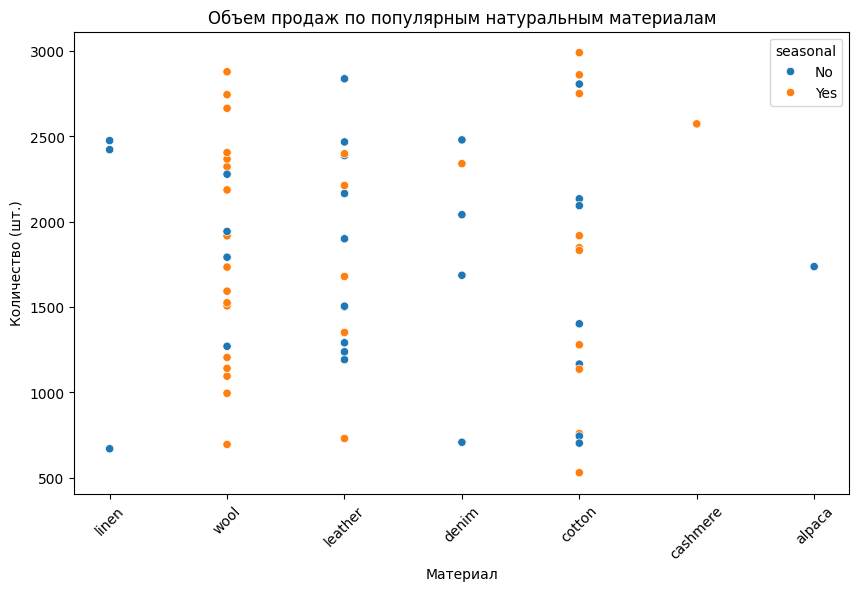

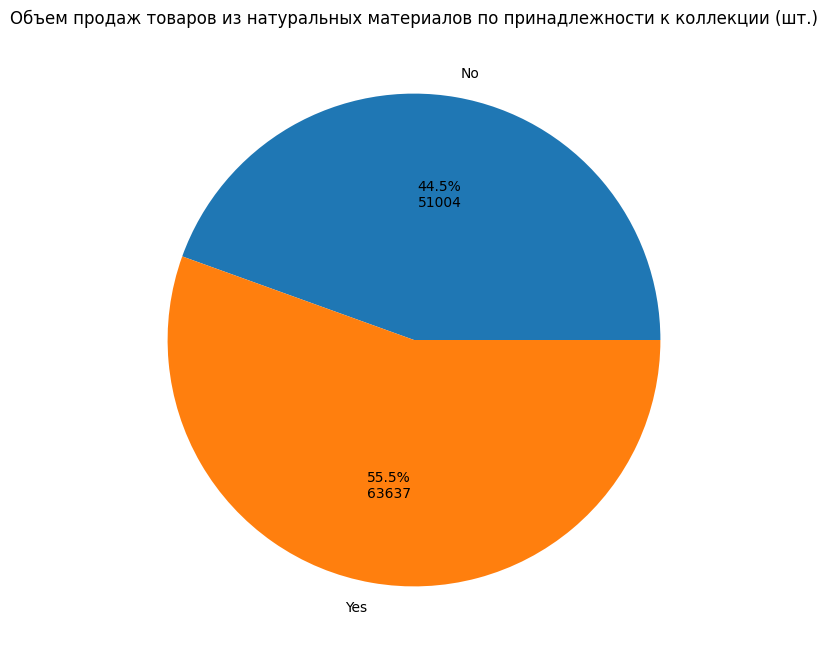

In [26]:
# Определяем натуральные материалы
natural_materials = ['cotton', 'wool', 'leather', 'cashmere', 'linen', 'bamboo', 'silk', 'jute', 'sisal', 'alpaca', 'denim']

# Фильтруем товары, содержащие натуральные материалы в описании и не содержащее 'faux'
mask = sales['description'].str.contains('|'.join(natural_materials), case=False) & ~sales['description'].str.contains('faux', case=False)
natural_products = sales[mask]

# Добавление материала в DataFrame
def get_material(description):
    for material in natural_materials:
        if material in description.lower():
            return material
    return 'Unknown'

natural_products['material'] = natural_products['description'].apply(get_material)

# Визуализация распределения цен по материалам
plt.figure(figsize=(10, 6))
sns.scatterplot(data=natural_products, x='material', hue='seasonal', y='sales_volume')
plt.title('Объем продаж по популярным натуральным материалам')
plt.xlabel('Материал')
plt.ylabel('Количество (шт.)')
plt.xticks(rotation=45)
plt.show()

# Подготовка данных для круговой диаграммы
seasonal_sales = natural_products.groupby('seasonal')['sales_volume'].sum()

# Визуализация круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(seasonal_sales, labels=seasonal_sales.index, autopct=lambda p : '{:.1f}%\n{:.0f}'.format(p, seasonal_sales.sum() * p / 100))
plt.title('Объем продаж товаров из натуральных материалов по принадлежности к коллекции (шт.)')
plt.show()

## Матрица корреляций
Построим корреляционную матрицу.

Корреляция Пирсона измеряет линейную зависимость между переменными и дает значение от -1 до 1, где:

1 означает полную положительную зависимость,

-1 — полную отрицательную зависимость,

0 — отсутствие линейной зависимости.

**Цена за единицу товара** и **Выручка** имеют сильную положительную корреляцию (0.75). Это означает, что чем выше цена, тем больше выручка от продажи.

**Объем продаж** и **Выручка** имеют умеренную положительную корреляцию (0.5). Это означает, что чем больше объем продаж, тем больше выручка от продажи.

**Цена за единицу товара** и **Объем продаж** имеют слабую отрицательную корреляцию (-0.072). Это означает, что не существует существенной связи между ценой и объемом продаж.

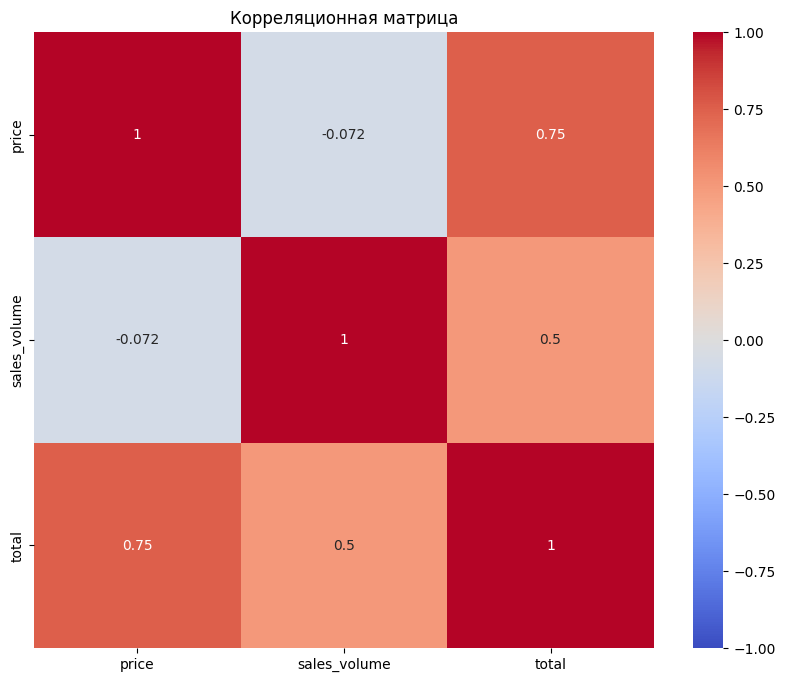

In [27]:
numeric_cols = ['price', 'sales_volume', 'total']
numeric_data = sales[numeric_cols]

correlation_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()